In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.svm as svm
housing_data = pd.read_csv('Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
from sklearn.preprocessing import LabelEncoder

# Identify the columns with string values and convert them to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']  # Replace with the actual column names
for column in categorical_columns:
    housing_data[column] = label_encoder.fit_transform(housing_data[column])


housing_data.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,1,0,0,0,1,2,0,1
96,6300000,9000,3,1,1,1,0,1,0,0,1,1,0
97,6300000,6400,3,1,1,1,1,1,0,1,1,1,1
98,6293000,6600,3,2,3,1,0,0,0,1,0,1,2


In [4]:
# Check for null values in the dataset
print(housing_data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Text(0.5, 1.0, 'Correlation On Housing Dataset')

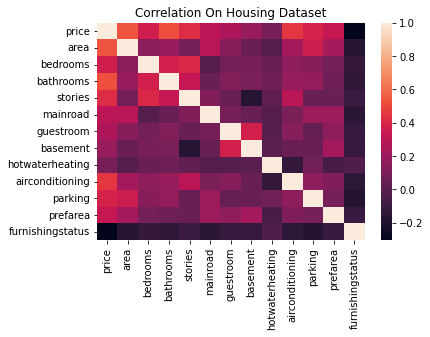

In [5]:
plt.figure(1)
sns.heatmap(housing_data.corr())
plt.title('Correlation On Housing Dataset')

In [10]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your housing dataset into variables X and Y
X = housing_data.drop(columns=['airconditioning'])
Y = housing_data['airconditioning']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

              precision    recall  f1-score   support

           0       0.71      0.79      0.74        85
           1       0.57      0.46      0.51        52

    accuracy                           0.66       137
   macro avg       0.64      0.62      0.63       137
weighted avg       0.65      0.66      0.66       137



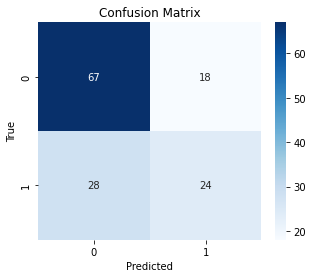

Accuracy: 0.6642335766423357


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Create and train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Classification report
print(classification_report(Y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy score
print('Accuracy:', accuracy_score(Y_test, y_pred))

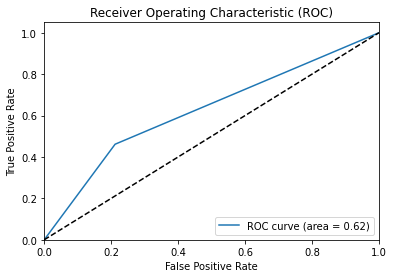

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the predicted probabilities of the positive class
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()